In [44]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [45]:
# read in the ratio data

data_folder = '../data/220601-X-188-blast-test/220601-X-188-no-blast-40x-output'
df = pd.read_csv(os.path.join(data_folder, 'ratio_per_sample_no_blast.csv'),
                 header=None)
df.columns = ['ratio_pos']
df['groups'] = ['-blast']*len(df)
df1 = df

In [46]:
# read in the ratio data

data_folder = '../data/220601-X-188-blast-test/220601-X-188-add-blast-40x-output'
df = pd.read_csv(os.path.join(data_folder, 'ratio_per_sample_blast.csv'),
                 header=None)
df.columns = ['ratio_pos']
df['groups'] = ['+blast']*len(df)
df2 = df

In [47]:
df = pd.concat([df1, df2])

In [48]:
df.reset_index(drop=True, inplace=True)
df

,ratio_pos,groups
0,0.671772,-blast
1,0.235474,-blast
2,0.744713,-blast
3,0.671441,-blast
4,0.287152,-blast
5,0.586357,-blast
6,0.663912,-blast
7,0.429020,-blast
8,0.479491,-blast
9,0.302711,-blast


In [49]:
df['ratio_pos_percent'] = df['ratio_pos']*100

In [50]:
df.groupby('groups').describe()['ratio_pos_percent']

,count,mean,std,min,25%,50%,75%,max
groups,,,,,,,,
+blast,10.0,80.431357,9.756598,63.724138,78.805181,80.572516,86.001823,94.661191
-blast,10.0,50.720426,18.626392,23.547401,33.428803,53.292392,66.955898,74.471299


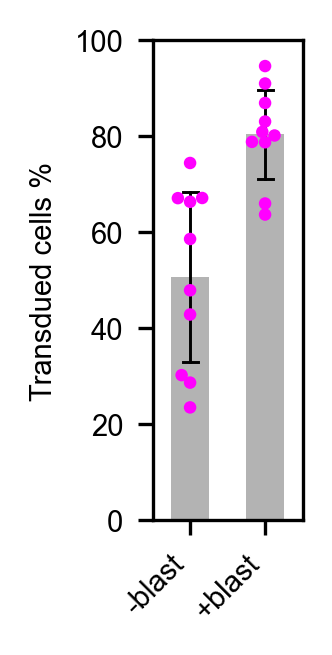

In [43]:
# Make plot for figure

fig_width, fig_height = 1.0, 2.0 # inches
line_width = .8
output_prefix = '220601-X-188-blast-ratios'
outputFigPath = '../jupyter_figures/' + output_prefix + '.svg'
# outputFigPath = '../jupyter_figures/' + output_prefix + '.tif'

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.45, 0.15, 0.5, 0.8])

sns.swarmplot(data = df,
              x = 'groups', y = 'ratio_pos_percent',
              color='#ff00ff',
              size = 3
             )
sns.barplot(data = df,
            x = 'groups', y = 'ratio_pos_percent',
            ci = 'sd',
            color=".7", # This a nicer looking lighter gray to my own taste
            errwidth=.7, errcolor="k", capsize=.2)

change_bar_width(ax, .5)

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

plt.xlabel("")
plt.ylabel("Transdued cells %")
plt.ylim([0,100])

# ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)

In [29]:
tukeyTest(df['ratio_pos_percent'], df['groups'])

Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
+blast -blast -29.7109 0.001 -43.6806 -15.7412   True
-----------------------------------------------------
p values of all pair-wise tests:
 0.001
